# Keras - MNIST 手寫數字辨識使用 CNN
## CNN 卷積神經網路簡介 

### STEP1. 卷積神經網路介紹 
CNN 卷積神經網路可以分成兩大部分:
1.影像的特徵提取: 透過 Convolution 與 Max Pooling 提取影像特徵.
2.Fully connected Feedforward network: Flatten layers, hidden layers and output layers

![title](img/01.png)

### STEP2. 卷積運算 (Convolution) 
卷積運算的原理是將一個影像透過卷積運算的 Filter weight(s) 產生多個影像, 在上面第一層的 Convolution 為例: 
1. 先以隨機方式產生 16 個 3x3 的 filter weight(S) 

2. 要轉換的影像由左而右,由上而下透過 filter weight 產生新影像的值: 

3. 使用 16 個 filter weight 產生 16 個影像 


![title](img/02.png)

### STEP3. Max-Pooling 運算說明 
Max-Pool 運算可以將影像縮減取樣 (downsampling), 如下圖: 原本影像是 4x4, 經過 Max-Pool 運算後, 影像大小為 2x2: 


![title](img/03.png)

downsampling 有以下好處: 
* 減少需要處理的資料點: 減少後續運算所需時間.
* 讓影像位置的差異變小: 例如手寫數字 7, 位置上下左右可能不同, 但是位置不同可能影響辨識. 減少影像大小讓數字的位置差異變小.
* 參數的數量和計算量下降: 這在一定程度上也控制了 Overfitting 的狀況.

# 程式碼

## 進行資料前處理 (Preprocess) 
* MLP : image reshape (60000, 784): MLP 因為直接送進神經元處理, 所以 60,000 筆轉換為一筆成 28x28 = 784 個神經元輸入.
* CNN : image reshape (60000, 28, 28, 1): CNN 因為必須先進行卷積與池化 (Max-Pool) 運算, 所以必須保留影像的維度. 因此 60,000 筆轉換成一筆成 28 (長) x 28(寬) x 1(高) 的影像單位.

## 1. Import data 

In [2]:
#import 相關資料
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

#產生隨機數
np.random.seed(10)  
#將手寫資料從keras讀入
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()
# Translation of data
X_Train4D = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')
X_Test4D = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')

## 2.將 Features 進行標準化與 Label Onehot encoding  

In [3]:
# Standardize feature data
X_Train4D_norm = X_Train4D / 255
X_Test4D_norm = X_Test4D /255

# Label Onehot-encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

## 3.建立卷積層與池化層 

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

#導入Sequential 模型
model = Sequential()

In [5]:
# Create CN layer 1
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))

In [6]:
# Create Max-Pool 1
model.add(MaxPooling2D(pool_size=(2,2)))

In [7]:
# Create CN layer 2
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))

In [8]:
# Create Max-Pool 2
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
# Create CN layer 3
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))

In [10]:
# Create Max-Pool 3
model.add(MaxPooling2D(pool_size=(2,2)))

# Add Dropout layer
model.add(Dropout(0.25))

#建立平坦層 
model.add(Flatten())

#建立 Hidden layer 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

#建立輸出層 
model.add(Dense(10, activation='softmax'))
model.summary()
print("")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 36)          32436     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 36)          0         
__________

## 進行訓練
### 4.定義訓練並進行訓練 

In [11]:
from keras import optimizers

In [12]:
# 定義訓練方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# 開始訓練
train_history = model.fit(x=X_Train4D_norm,y=y_TrainOneHot, validation_split=0.2,epochs=10, batch_size=300, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 151us/step - loss: 0.5820 - acc: 0.8126 - val_loss: 0.1012 - val_acc: 0.9705
Epoch 2/10
48000/48000 [==============================] - 5s 94us/step - loss: 0.1435 - acc: 0.9571 - val_loss: 0.0643 - val_acc: 0.9807
Epoch 3/10
48000/48000 [==============================] - 4s 92us/step - loss: 0.1008 - acc: 0.9693 - val_loss: 0.0520 - val_acc: 0.9838
Epoch 4/10
48000/48000 [==============================] - 4s 93us/step - loss: 0.0791 - acc: 0.9776 - val_loss: 0.0436 - val_acc: 0.9868
Epoch 5/10
48000/48000 [==============================] - 4s 91us/step - loss: 0.0683 - acc: 0.9794 - val_loss: 0.0413 - val_acc: 0.9886
Epoch 6/10
48000/48000 [==============================] - 4s 92us/step - loss: 0.0586 - acc: 0.9826 - val_loss: 0.0366 - val_acc: 0.9897
Epoch 7/10
48000/48000 [==============================] - 4s 91us/step - loss: 0.0493 - acc: 0.9855 - val_loss: 0.0344 - val_ac

### 5.畫出 accuracy 執行結果 
之前的訓練步驟產生的 accuracy 與 loss 都會記錄在 train_history 變數. 底下將常用的函數定義在 utils.py

In [14]:
import matplotlib.pyplot as plt

In [15]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [16]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "l=" + str(labels[idx])
        if len(prediction) > 0:
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))
        else:
            title = "l={}".format(str(labels[idx]))
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

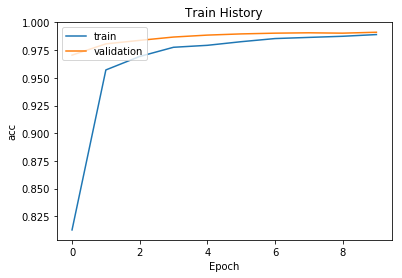

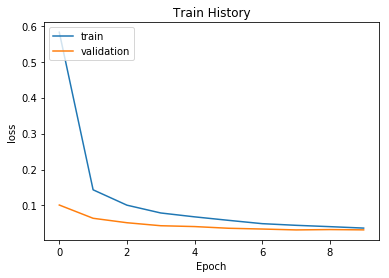

In [17]:
#使用函數 show_train_history 顯示 accuracy 在 train 與 evaluation 的差異與 loss 在 train 與 evaluation 的差異
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')

### 評估模型準確率與進行預測 
已經完成訓練, 接下來要使用 test 測試資料集來評估準確率

### 6.評估模型準確率 

In [18]:
scores = model.evaluate(X_Test4D_norm, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 1s 122us/step

	[Info] Accuracy of testing data = 99.3%


### 7.預測結果與顯示前 10 筆預測結果

	[Info] Making prediction of X_Test4D_norm

	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 6 4 2]



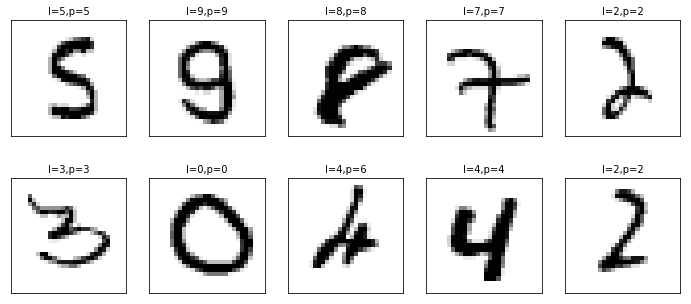

In [19]:
print("\t[Info] Making prediction of X_Test4D_norm")
prediction = model.predict_classes(X_Test4D_norm)  # Making prediction and save result to prediction
print()
print("\t[Info] Show 10 prediction result (From 240):")
print("%s\n" % (prediction[240:250]))
plot_images_labels_predict(X_Test, y_Test, prediction, idx=240)

### 8.使用Seaborn畫出Confusion Matrix 

	[Info] Display Confusion Matrix:


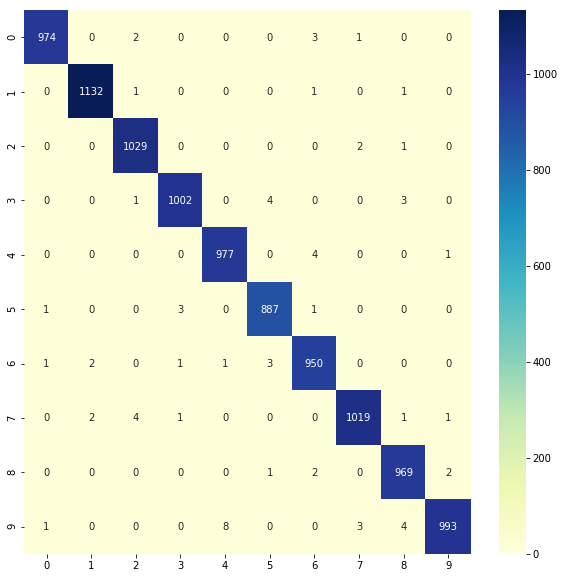

In [20]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
print("\t[Info] Display Confusion Matrix:")
cm = metrics.confusion_matrix(y_Test, prediction)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, fmt="d",cmap="YlGnBu")